In [1]:
import numpy as np
import pandas as pd
import music21
import random
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(401)

In [2]:
data = pd.read_csv('train.csv')
data.head()

,piece,beats,pitches,beat_pitch
0,../abc/Polonäs_efter_Rondahl_i_D_6b27b9.abc,"[[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 3, ...","[[62, 66, 69, 74, 73, 71, 69, 67, 66, 64, 62],...","[[(1, 62), (3, 66), (4, 69), (5, 74), (6, 73),..."
1,../abc/Polonäs_9c99ae.abc,"[[1, 2, 3, 4, 5, 7, 9, 10, 11, 12], [1, 4, 5, ...","[[74, 72, 70, 69, 67, 62, 60, 58, 57, 55], [67...","[[(1, 74), (2, 72), (3, 70), (4, 69), (5, 67),..."
2,../abc/Polonäs_ef3c04.abc,"[[1, 3, 4, 5, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9],...","[[79, 79, 81, 79, 74], [75, 74, 72, 70, 69, 70...","[[(1, 79), (3, 79), (4, 81), (5, 79), (9, 74)]..."
3,../abc/Polonäs_be5f8c.abc,"[[1, 5, 6, 7, 8, 9, 11], [1, 4, 5, 7, 8, 9, 12...","[[62, 65, 64, 62, 61, 62, 64], [65, 67, 69, 69...","[[(1, 62), (5, 65), (6, 64), (7, 62), (8, 61),..."
4,../abc/_Polska_ur_Sven_Donats_notbok_Ma584_3df...,"[[1, 3, 4, 5, 7, 8, 9], [1, 3, 4, 5, 7, 8, 9],...","[[74, 74, 73, 74, 76, 78, 69], [71, 71, 69, 71...","[[(1, 74), (3, 74), (4, 73), (5, 74), (7, 76),..."


In [3]:
import ast
# change the note column to list
data['beats'] = data['beats'].apply(ast.literal_eval)
data['pitches'] = data['pitches'].apply(ast.literal_eval)
data['beat_pitch'] = data['beat_pitch'].apply(ast.literal_eval)

In [4]:
from collections import defaultdict
from collections import Counter

# get the bigram of the music data
bigram = []
bigram_freq = defaultdict(int)

# get the bigram of each song
for i in range(len(data)):
    for bar in data.loc[i,'beat_pitch']:
        bigram.extend(zip(bar, bar[1:]))
    
# print(bigram)

# get the frequency of every bigram
bigram_freq = dict(Counter(bigram))
print(len(bigram_freq))

3877


In [5]:
# remove the identical bigram or bigram with wrong direction
wrong_bigrams = []
for key in bigram_freq:
    if key[0][0] >= key[1][0] or key[1][0]>12:
        wrong_bigrams.append(key)
for key in wrong_bigrams:
    del bigram_freq[key]
print(len(bigram_freq))
print(bigram_freq)

3793
{((1, 62), (3, 66)): 17, ((3, 66), (4, 69)): 28, ((4, 69), (5, 74)): 14, ((5, 74), (6, 73)): 24, ((6, 73), (7, 71)): 13, ((7, 71), (8, 69)): 59, ((8, 69), (9, 67)): 45, ((9, 67), (10, 66)): 13, ((10, 66), (11, 64)): 12, ((11, 64), (12, 62)): 26, ((1, 59), (3, 74)): 8, ((3, 74), (5, 57)): 7, ((5, 57), (7, 73)): 3, ((7, 73), (9, 74)): 34, ((1, 69), (5, 67)): 6, ((5, 67), (9, 66)): 6, ((1, 74), (2, 73)): 51, ((2, 73), (3, 74)): 33, ((3, 74), (4, 78)): 24, ((4, 78), (5, 76)): 33, ((5, 76), (6, 74)): 84, ((6, 74), (7, 73)): 40, ((7, 73), (8, 71)): 50, ((8, 71), (9, 69)): 92, ((1, 69), (3, 59)): 1, ((3, 59), (5, 67)): 1, ((5, 67), (7, 57)): 1, ((7, 57), (9, 66)): 1, ((9, 66), (11, 55)): 1, ((9, 69), (11, 67)): 38, ((1, 66), (2, 62)): 9, ((2, 62), (3, 64)): 18, ((3, 64), (4, 66)): 24, ((4, 66), (5, 67)): 132, ((5, 67), (6, 69)): 19, ((6, 69), (7, 71)): 41, ((7, 71), (8, 73)): 22, ((8, 73), (9, 66)): 1, ((9, 66), (10, 62)): 2, ((10, 62), (11, 64)): 6, ((11, 64), (12, 76)): 2, ((2, 73), (3

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

position_pitch_freq = defaultdict(int)

for beat_pitch in data['beat_pitch']:
    for bar in beat_pitch:
        for (pos, pitch) in bar:
            if pos <13:
                position_pitch_freq[(pos,pitch)] += 1

# Convert the defaultdict to a DataFrame
df = pd.DataFrame.from_dict(position_pitch_freq, orient='index')

# Reset the index and rename the columns
df = df.reset_index()
df.columns = ['Position_Pitch', 'Frequency']

# Create separate columns for Position and Pitch
df[['Position', 'Pitch']] = pd.DataFrame(df['Position_Pitch'].tolist(), index=df.index)
df = df.drop('Position_Pitch', axis=1)

# Pivot the DataFrame to create a multi-index with Position and Pitch
df_pivot = df.pivot_table(index='Pitch', columns='Position', values='Frequency', fill_value=0)

# Sort the DataFrame by the index (Pitch) in ascending order
df_pivot = df_pivot.sort_index(ascending=False)



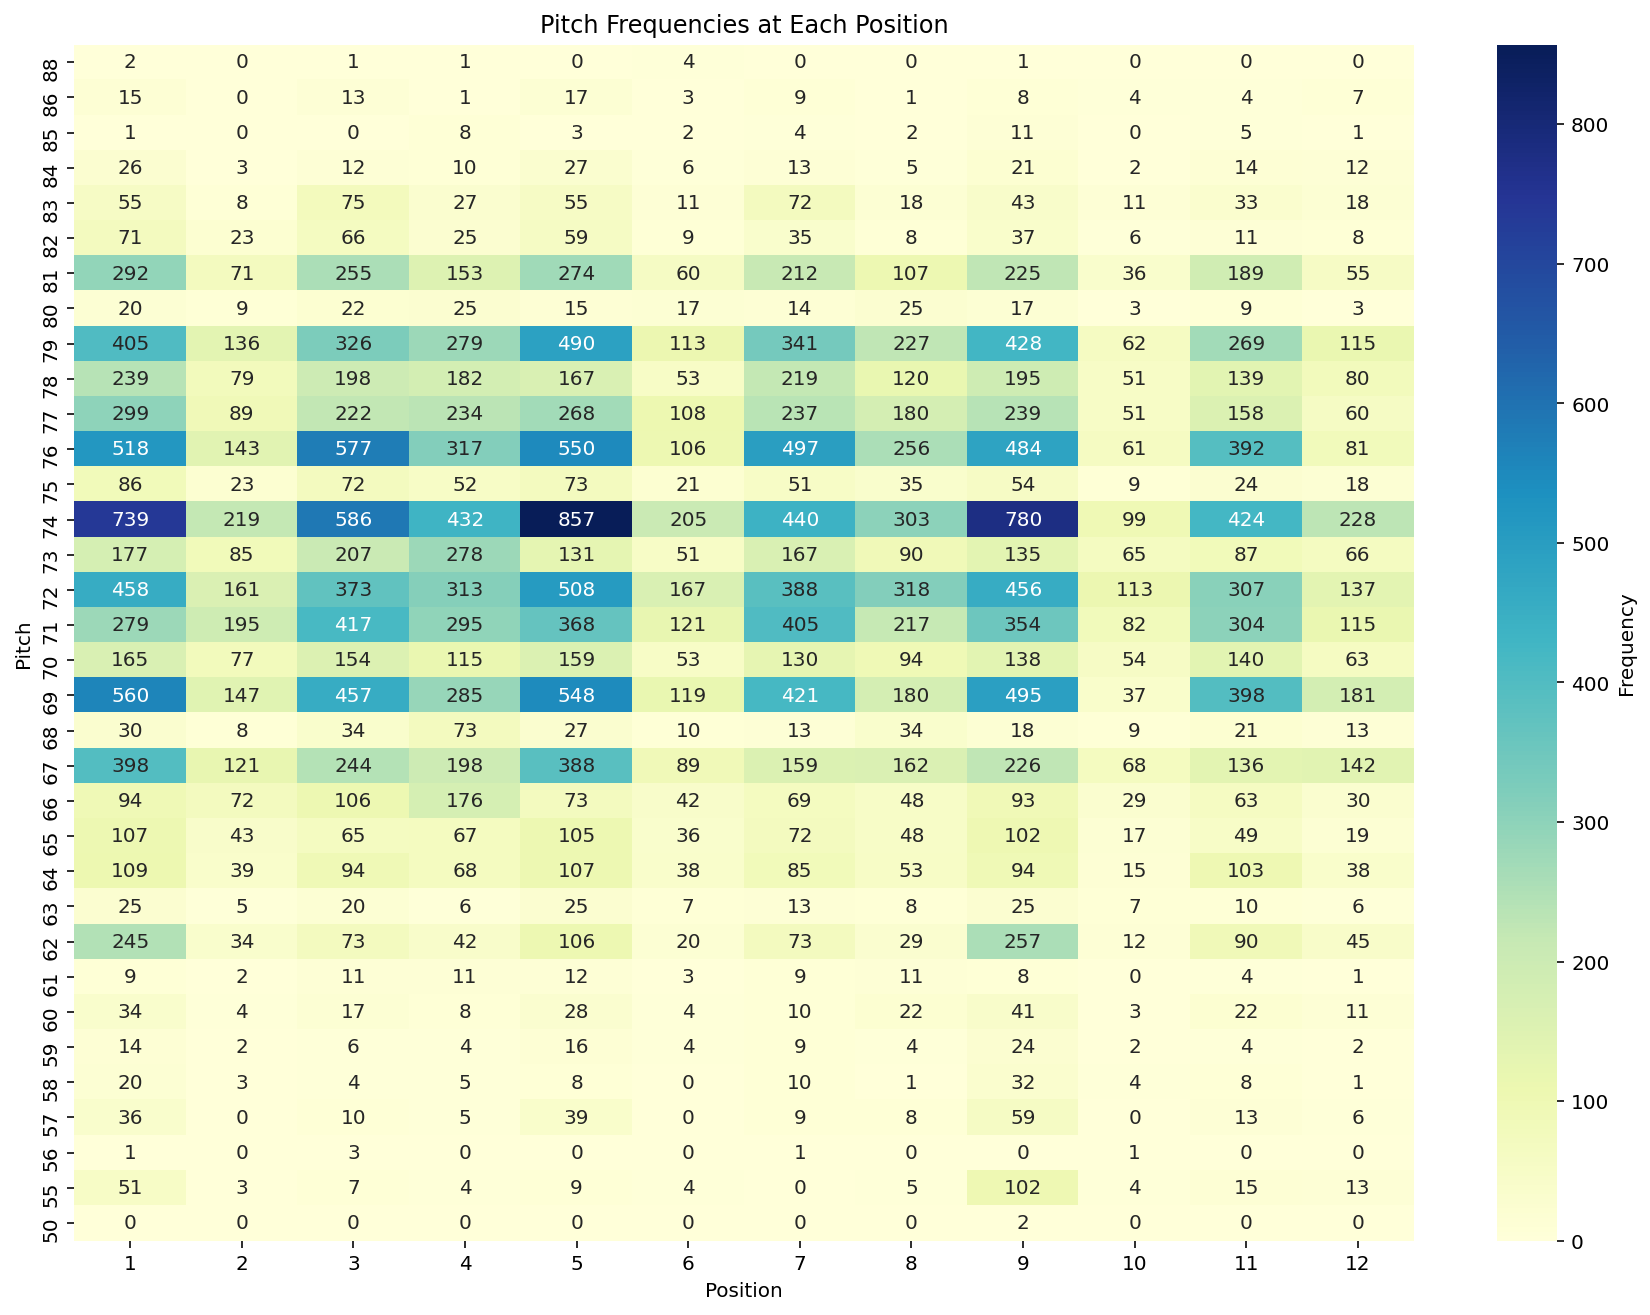

In [11]:
plt.figure(figsize=(15, 11))
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Frequency'})
plt.xlabel("Position")
plt.ylabel("Pitch")
plt.title("Pitch Frequencies at Each Position")
plt.savefig('pitch_frequency.png')
plt.show()

In [6]:
# the generation model

# use the current position to predict the next position
def predict_next_state(bigram_freq, current_state):
    """
    predict the next state based on the bigram frequency
    """
    # get the possible next states
    possible_next_states = [k[1] for k, v in bigram_freq.items() if k[0] == current_state]
    # get the frequency of each possible next state
    freq = [v for k, v in bigram_freq.items() if k[0] == current_state]
    # normalize the frequency
    freq = np.array(freq) / np.sum(freq)
    # predict the next state
    next_state = random.choices(possible_next_states, weights=freq,k=1)[0]
    return next_state

# get the cosine similarity between two bars
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

# change the position list to a vector of length 12
def seq_to_vec(seq):
    vec = [0] * 12
    for tup in seq:
        vec[tup[0]-1] = tup[1]
    return vec

# given the start position, generate a bar
def generate_a_bar(bigram_freq, start_state):
    """
    generate a bar based on the bigram frequency
    """
    bar = [start_state]
    while True:
        next_state = predict_next_state(bigram_freq, bar[-1])
        bar.append(next_state)
        # stop when the next state is 12 or the bar is longer than 4 and the next state is larger than 9 at the probability of 0.6
        if next_state[0] == 12 or (len(bar) >= 4 and next_state[0] >= 9 and np.random.random() > 0.6):
            break
    return bar

# generate a sequence of bars
def generate_sequence(bigram_freq, start_state, num_bars, similarity_threshold=0.5):
    """
    generate a sequence based on the bigram frequency
    """
    sequence = [generate_a_bar(bigram_freq, start_state)]
    while len(sequence) < num_bars:
        bar = generate_a_bar(bigram_freq, start_state)
        # compare the similarity between the last bar in the sequence and the new bar
        vec1 = seq_to_vec(sequence[-1])
        vec2 = seq_to_vec(bar)
        similarity = cosine_similarity(vec1, vec2)

        if similarity >= similarity_threshold:
            sequence.append(bar)

    return sequence

In [7]:
# generate a sequence based on the bigram frequency
sequence = generate_sequence(bigram_freq, start_state=(1,72),num_bars=8,similarity_threshold=0.85)
print(sequence)

[[(1, 72), (3, 69), (5, 67), (7, 67), (8, 64), (9, 62)], [(1, 72), (3, 72), (4, 74), (5, 79), (7, 76), (8, 74), (9, 79), (11, 81)], [(1, 72), (3, 74), (5, 74), (7, 69), (9, 69), (11, 67)], [(1, 72), (5, 72), (7, 74), (9, 77), (11, 74)], [(1, 72), (5, 76), (7, 77), (8, 80), (9, 79), (11, 71)], [(1, 72), (5, 64), (7, 66), (8, 69), (9, 74)], [(1, 72), (3, 82), (5, 77), (7, 77), (8, 70), (9, 63)], [(1, 72), (2, 71), (3, 72), (5, 72), (7, 76), (8, 79), (9, 83), (11, 84)]]


In [8]:
# calculate the most common start state
start_states = []
for i in range(len(data)):
    for bar in data.loc[i,'beat_pitch']:
        try:
            start_states.append(bar[0])
        except:
            pass
start_states = dict(Counter(start_states))
print(len(start_states))

45


In [12]:
# generate 500 sequences based on the most common start state
sequences = pd.DataFrame(columns=['beat','pitch','beat_pitch'])
i = 0
while i < 500:
    try:
        # randomly choose a start state
        start_state = random.choices(list(start_states.keys()), weights=list(start_states.values()),k=1)[0]
        sequence = generate_sequence(bigram_freq, start_state=start_state,num_bars=8,similarity_threshold=0.85)
        beats = []
        pitches = []
        for bar in sequence:
            beats.append([beat for (beat, pitch) in bar])
            pitches.append([pitch for (beat, pitch) in bar])
        sequences = sequences.append({'beat':beats,'pitch':pitches,'beat_pitch':sequence},ignore_index=True)
    except:
        i -= 1
    i += 1
sequences.to_csv('markov_songs_with_pitch.csv',index=True)